<a href="https://colab.research.google.com/github/harshapriyanka/MachineLearning/blob/master/SHALA-2020/Assignments/MachineLearning/L1/ML_Assignment1_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# importing libraries for data visualisations
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

In [0]:
# sklearn modules for preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# sklearn modules for ML model selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split  
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.model_selection import ShuffleSplit
# from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, make_scorer, precision_score, average_precision_score

In [44]:
data = pd.read_csv('https://raw.githubusercontent.com/harshapriyanka/MachineLearning/master/SHALA-2020/Assignments/MachineLearning/L1/attrition.csv')
data_copy = data.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1028 non-null   int64 
 1   Attrition                 1028 non-null   int64 
 2   BusinessTravel            1028 non-null   object
 3   DailyRate                 1028 non-null   int64 
 4   Department                1028 non-null   object
 5   DistanceFromHome          1028 non-null   int64 
 6   Education                 1028 non-null   int64 
 7   EducationField            1028 non-null   object
 8   EmployeeCount             1028 non-null   int64 
 9   EmployeeNumber            1028 non-null   int64 
 10  EnvironmentSatisfaction   1028 non-null   int64 
 11  Gender                    1028 non-null   object
 12  HourlyRate                1028 non-null   int64 
 13  JobInvolvement            1028 non-null   int64 
 14  JobLevel                

# **EDA**

In [45]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4


In [46]:
data.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.0,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,36.999027,0.167315,806.551556,9.010700,2.873541,1.0,710.198444,2.719844,65.451362,2.731518,2.093385,2.757782,6632.573930,14243.531128,2.697471,15.172179,3.152724,2.732490,0.758755,11.417315,2.769455,2.763619,7.100195,4.263619,2.210117,4.141051,513.500000
std,9.444297,0.373439,407.043735,8.078418,1.032840,0.0,418.513656,1.089614,20.274229,0.703240,1.141854,1.105306,4855.747841,7048.768076,2.527534,3.647641,0.359896,1.088774,0.836236,8.015441,1.302518,0.703005,6.316289,3.630387,3.288559,3.608460,296.902341
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.750000,2.000000,2.000000,1.0,351.750000,2.000000,48.000000,2.000000,1.000000,2.000000,2886.000000,8259.750000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,256.750000
50%,36.000000,0.000000,813.000000,7.000000,3.000000,1.0,701.500000,3.000000,65.000000,3.000000,2.000000,3.000000,4907.500000,14074.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,513.500000
75%,43.000000,0.000000,1157.250000,13.000000,4.000000,1.0,1069.250000,4.000000,83.000000,3.000000,3.000000,4.000000,8729.500000,20342.250000,4.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,770.250000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,1447.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1027.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa313c12780>,
      dtype=object)

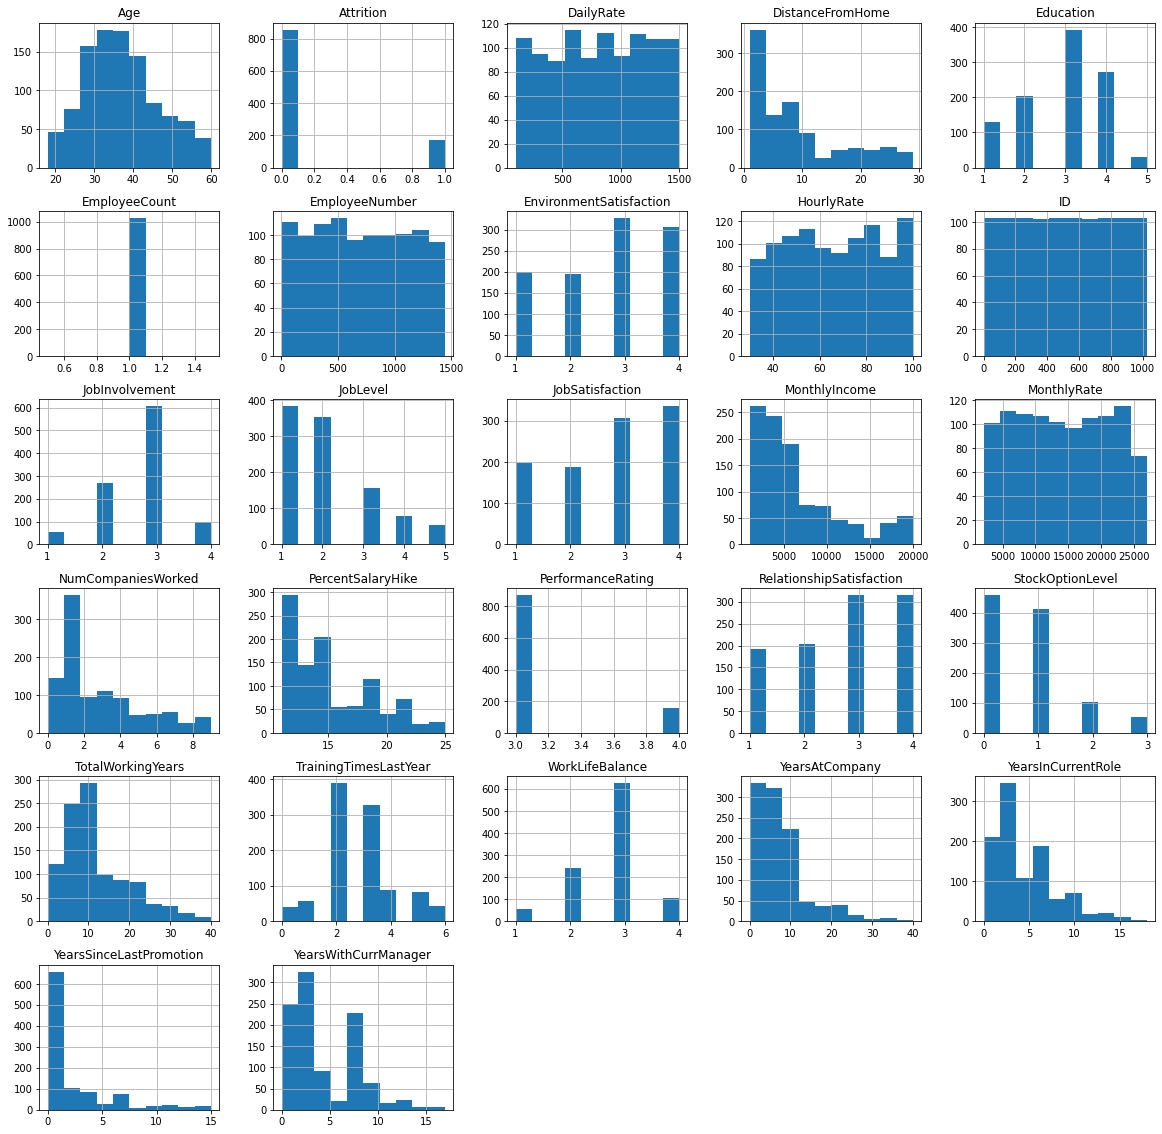

In [47]:
data.hist(figsize=(20,20))

Inferences from Histogram:
1.   ID is unique identifier of an employee.  
2.   EmployeeNumber, EmployeeCount and DailyRate is likely to be some unique number for each employee giventhe feature’s quasi-uniform distribution. Clear distinction can be seen using countplots.

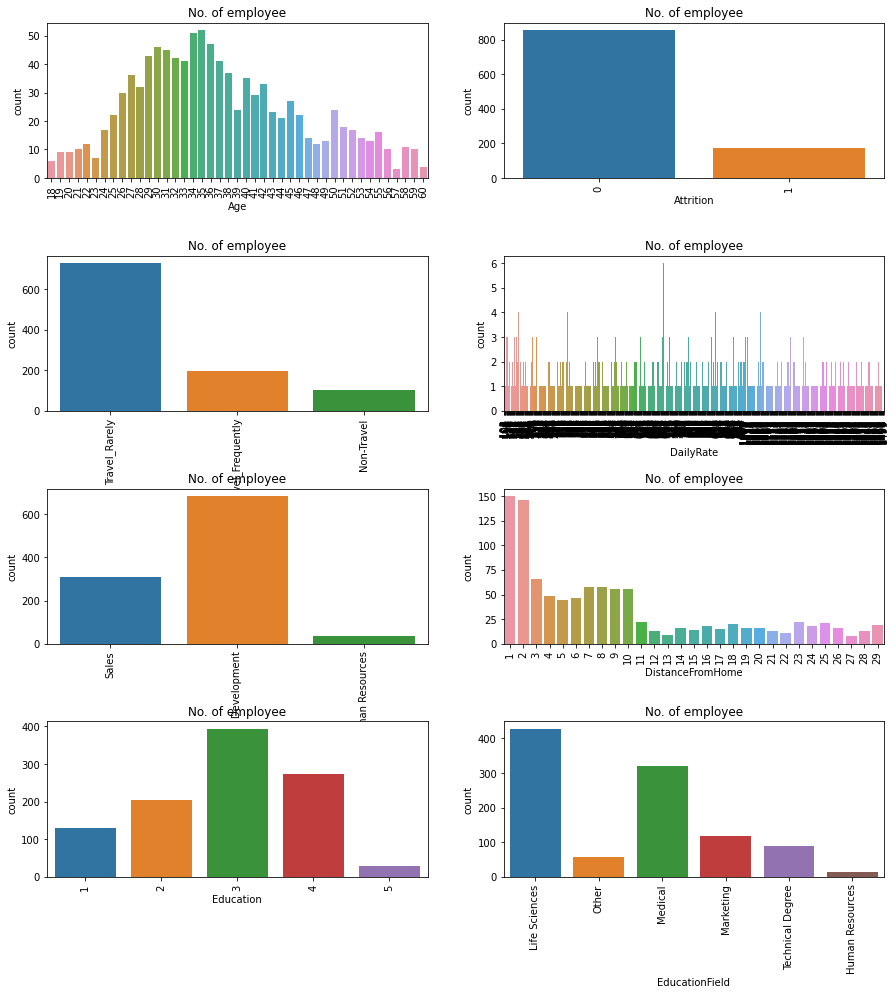

In [48]:
features=['Age','Attrition','BusinessTravel','DailyRate','Department','DistanceFromHome', 'Education','EducationField',
          'EmployeeNumber','EnvironmentSatisfaction','Gender','HourlyRate','JobInvolvement','JobLevel','JobRole','JobSatisfaction',
          'MaritalStatus','MonthlyIncome','MonthlyRate','NumCompaniesWorked','OverTime','PercentSalaryHike',
          'PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears',
          'TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion',
          'YearsWithCurrManager']

f1 = features[0:8]
fig=plt.subplots(figsize=(15, 20))
for i, j in enumerate(f1):
    plt.subplot(5, 2, i+1)
    plt.subplots_adjust(hspace = 0.5)
    sns.countplot(x=j,data = data)
    plt.xticks(rotation=90)
    plt.title("No. of employee")

DailyRate doesn't seem to have exact unique value for each employee.

In [49]:
data['Attrition'].value_counts()

0    856
1    172
Name: Attrition, dtype: int64

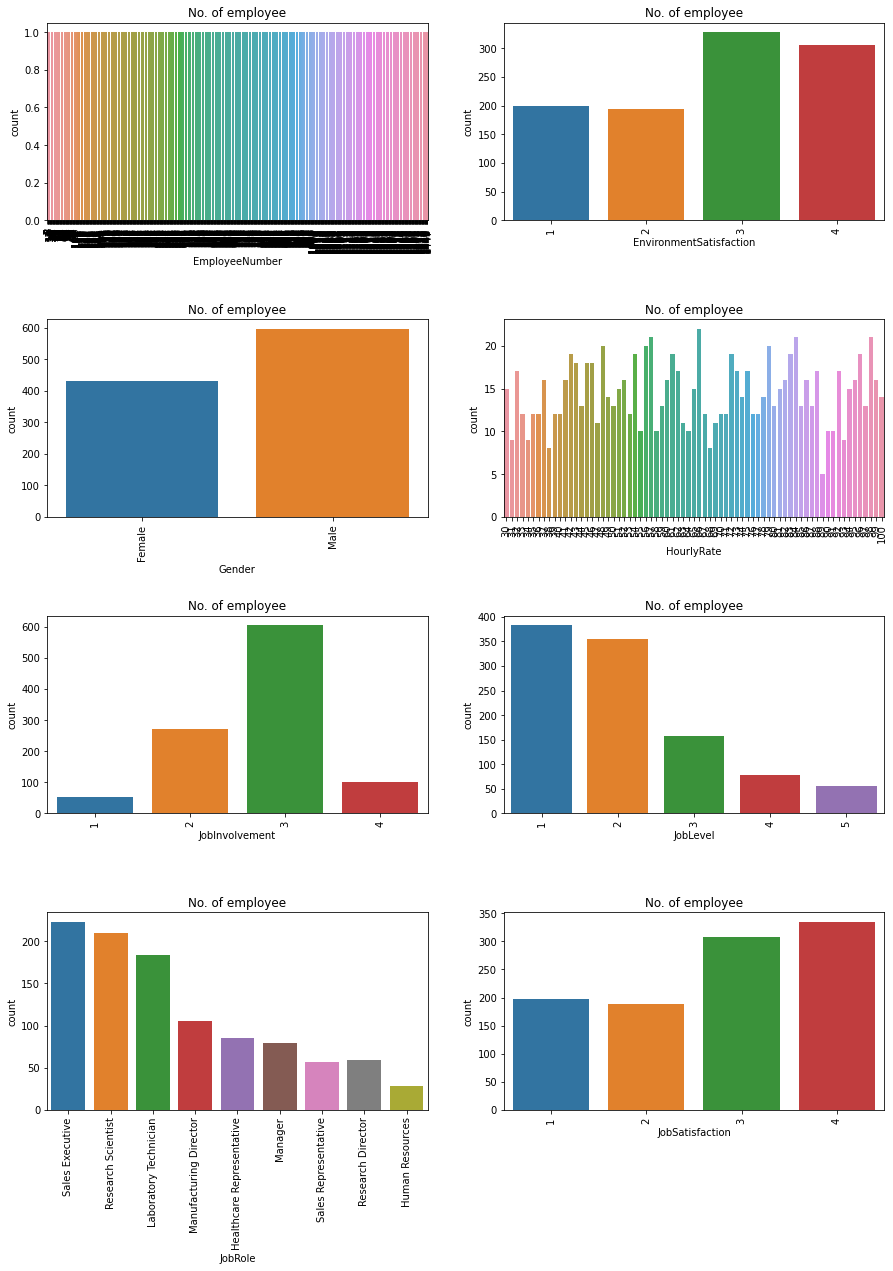

In [50]:
f2 = features[8:16]
fig=plt.subplots(figsize=(15, 20))
for i, j in enumerate(f2):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 0.5)
    sns.countplot(x=j,data = data)
    plt.xticks(rotation=90)
    plt.title("No. of employee")

We can observe that the 'EmployeeNumber' is unique for each employee.

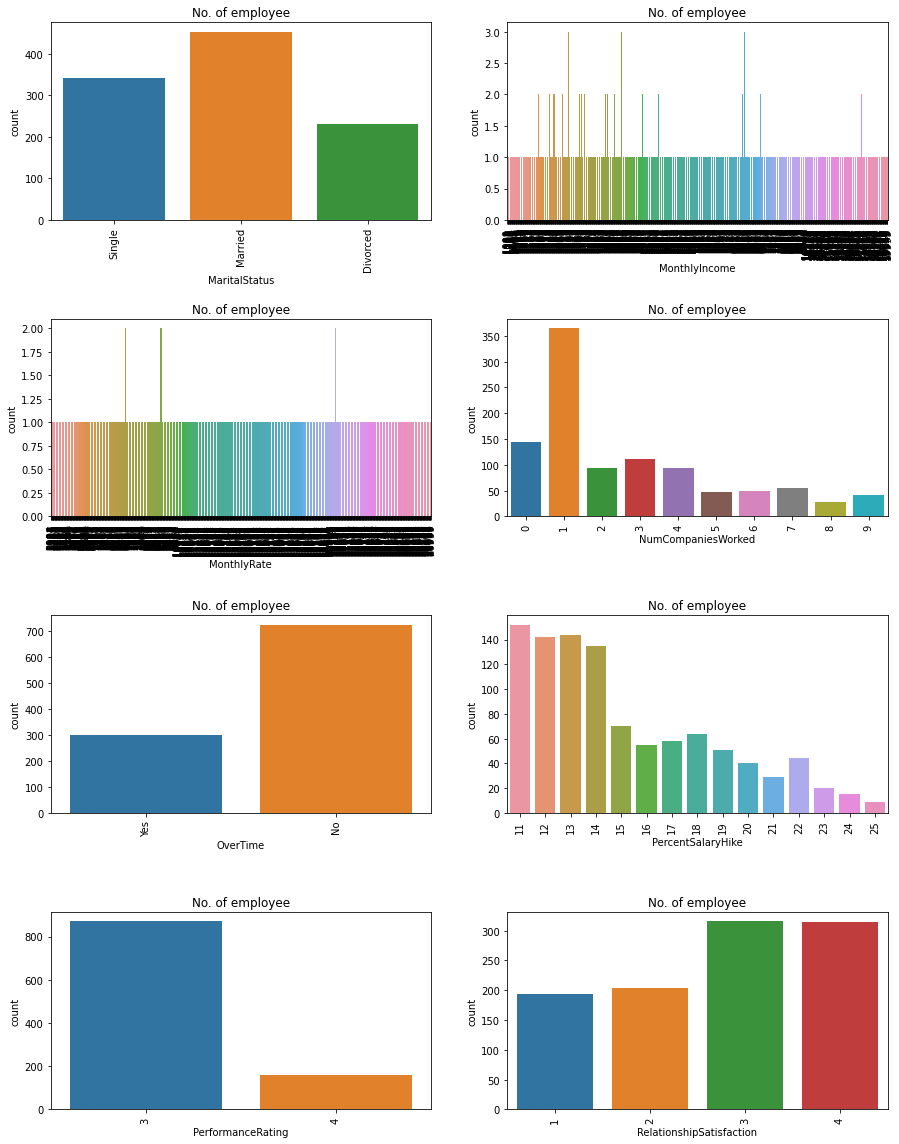

In [51]:
f3 = features[16:24]
fig=plt.subplots(figsize=(15, 20))
for i, j in enumerate(f3):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 0.5)
    sns.countplot(x=j,data = data)
    plt.xticks(rotation=90)
    plt.title("No. of employee")

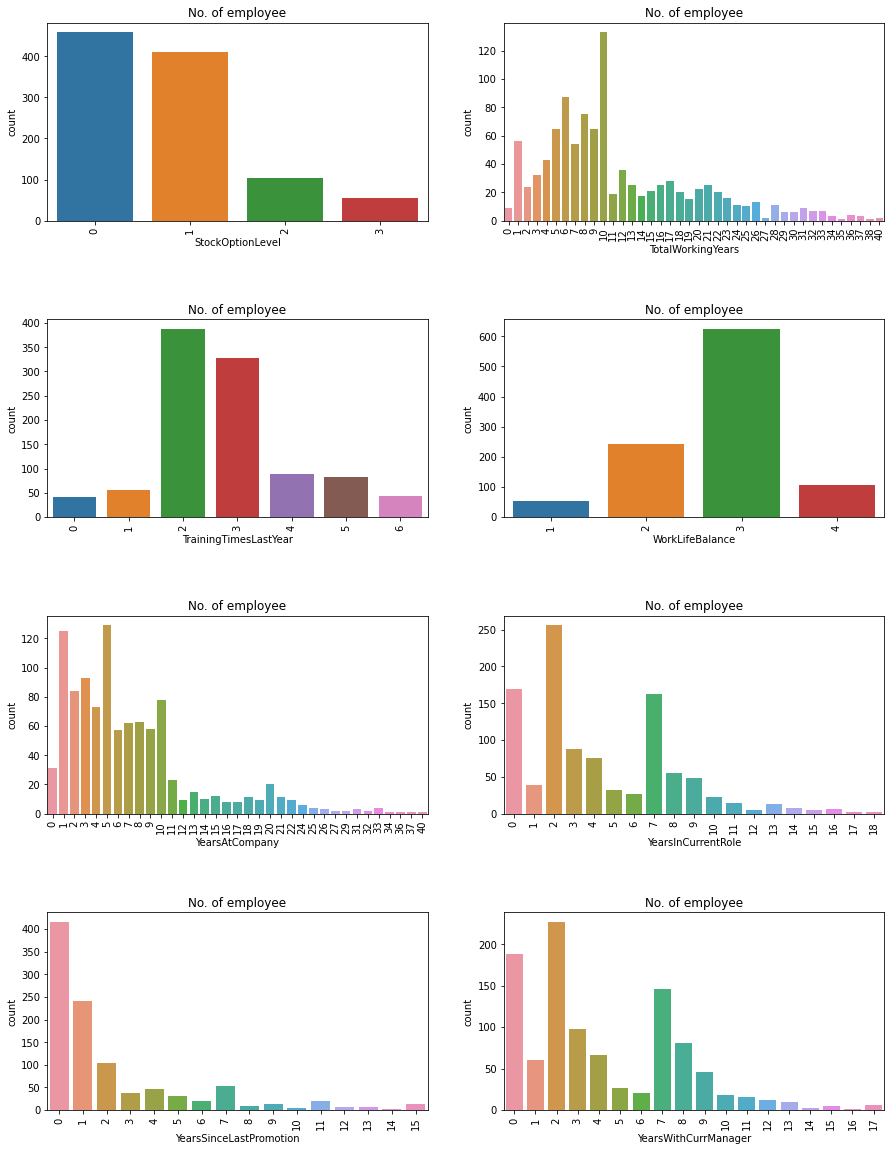

In [52]:
f4 = features[24:]
fig=plt.subplots(figsize=(15, 20))
for i, j in enumerate(f4):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 0.5)
    sns.countplot(x=j,data = data)
    plt.xticks(rotation=90)
    plt.title("No. of employee")

Inferences from countplot:


1.   Age  distribution  is  a  slightly  right-skewed  normal  distribution  with  the  bulk  of  the  staffbetween 25 and 45 years old.•••••

2.   No.  of male employees are more than No.  of female employees.

1.   DailyRate doesn’t seem to have exact unique value for each employee.
2.   EmployeeNumberis unique for each employee.

1.   Most of the employees travelrarely.

2.   Most importantly, fromAttrition, we can say that the data isimbalancedwith the majoriyof observations describing Currently Active Employees(around 83%).







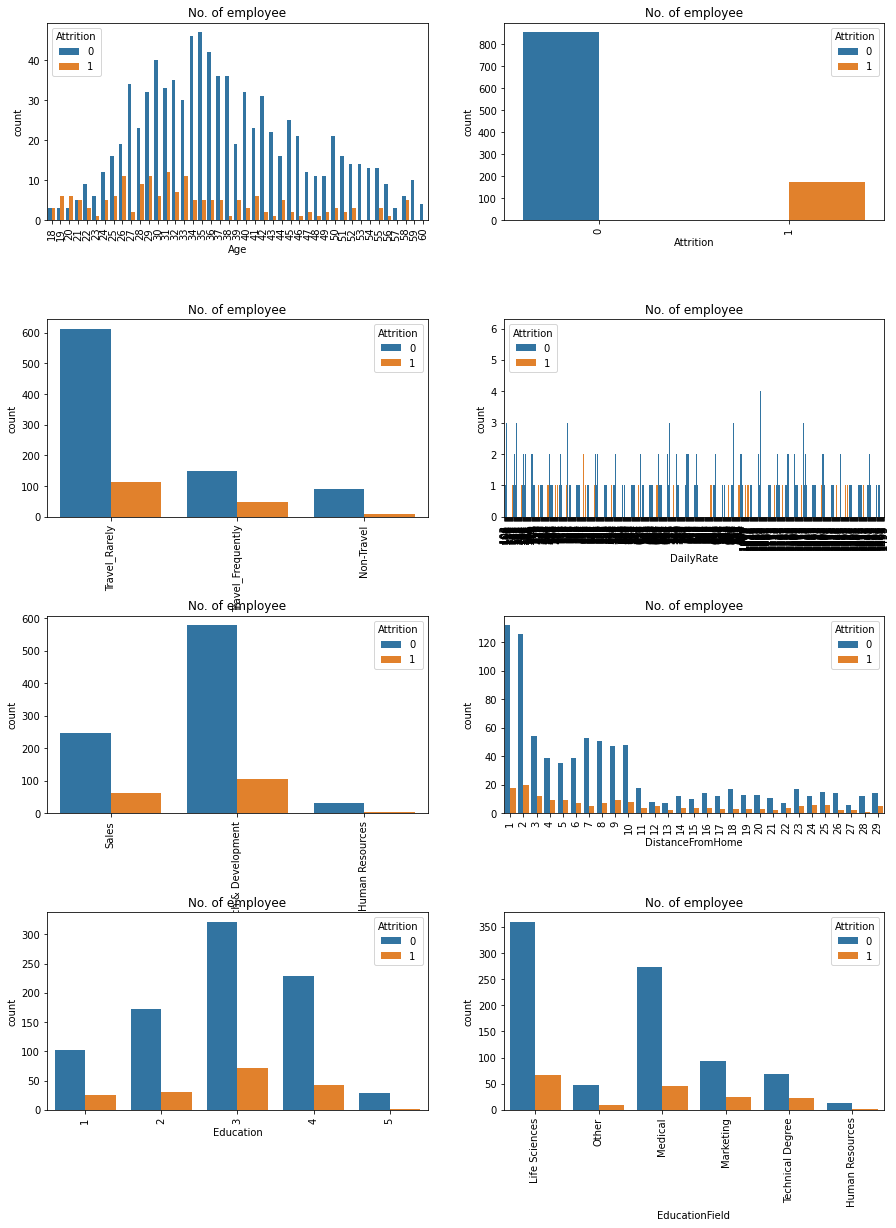

In [53]:
fig=plt.subplots(figsize=(15, 20))
for i, j in enumerate(f1):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 0.5)
    sns.countplot(x=j,data = data, hue='Attrition')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

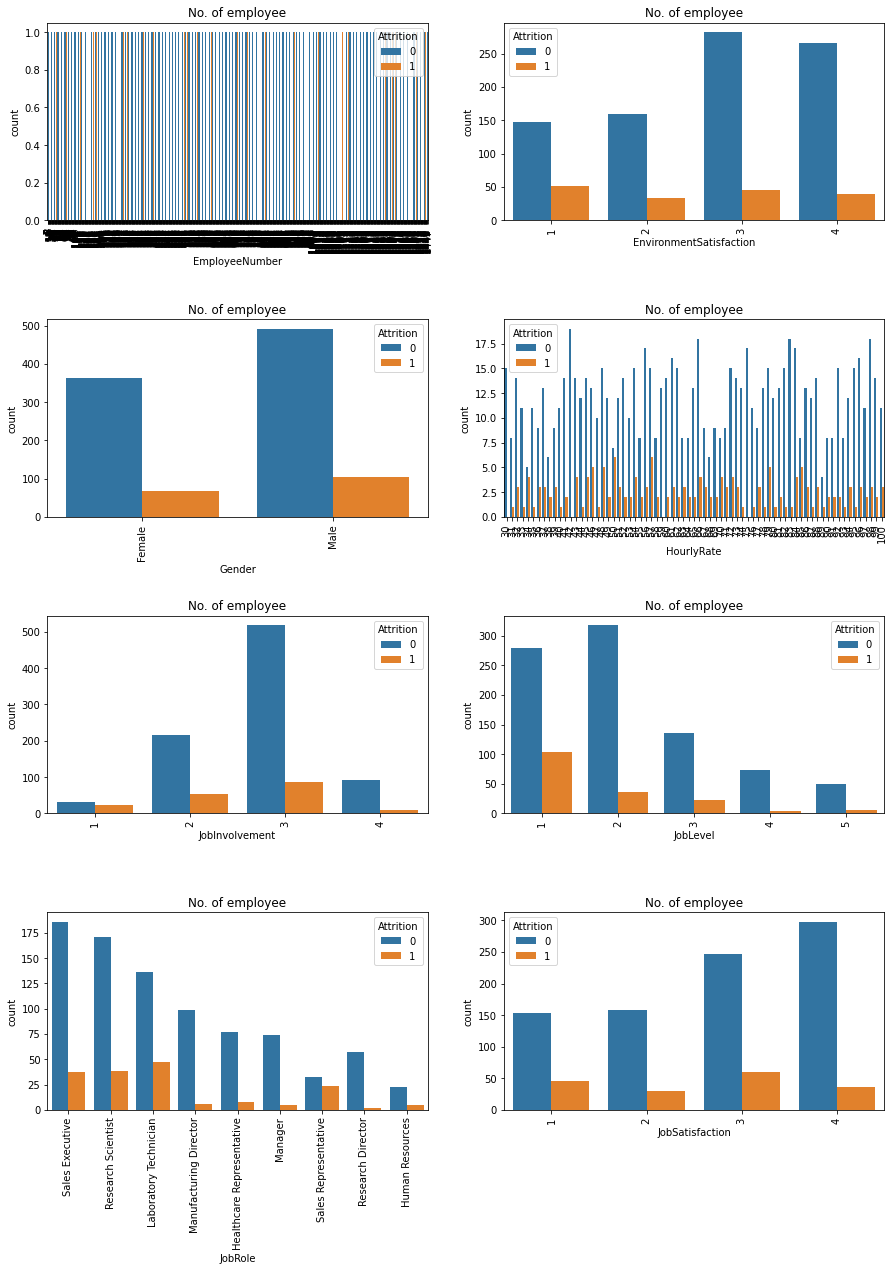

In [54]:
fig=plt.subplots(figsize=(15, 20))
for i, j in enumerate(f2):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 0.5)
    sns.countplot(x=j,data = data, hue='Attrition')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

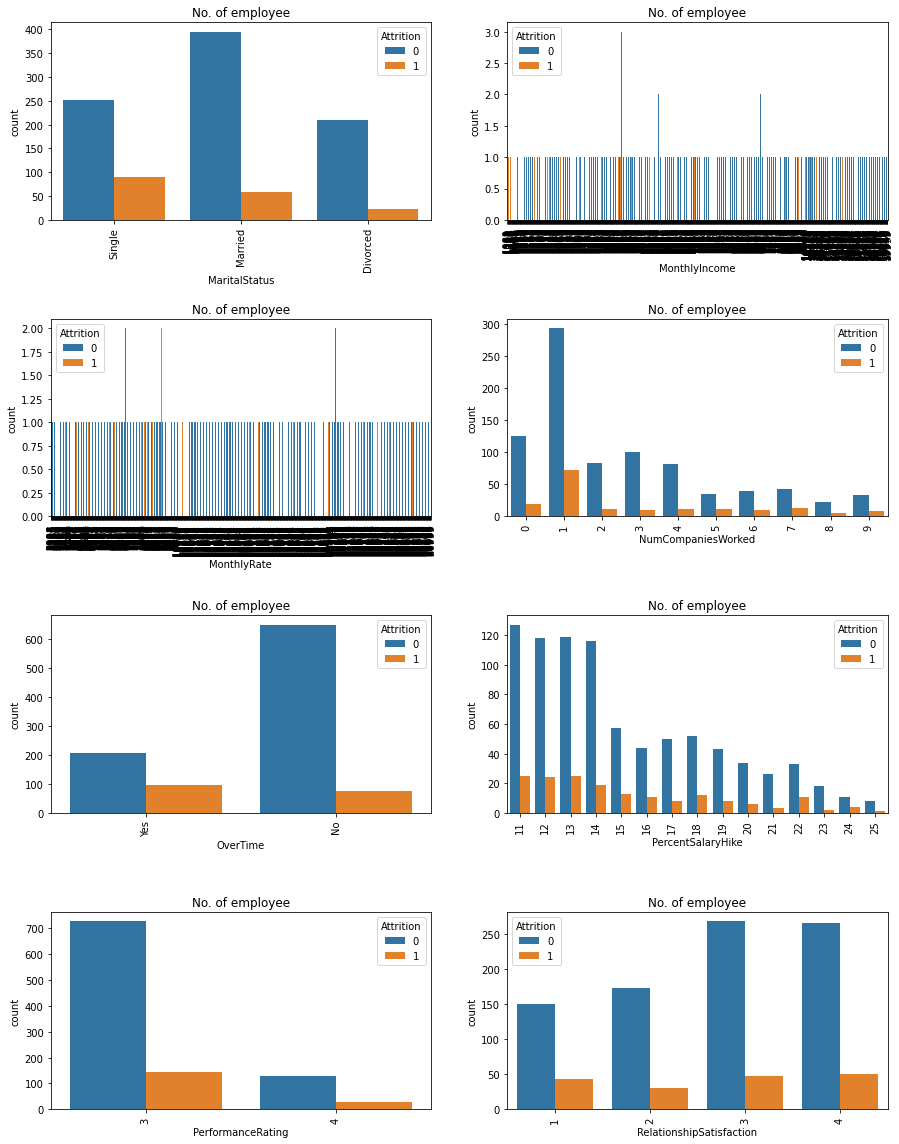

In [55]:
fig=plt.subplots(figsize=(15, 20))
for i, j in enumerate(f3):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 0.5)
    sns.countplot(x=j,data = data, hue='Attrition')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

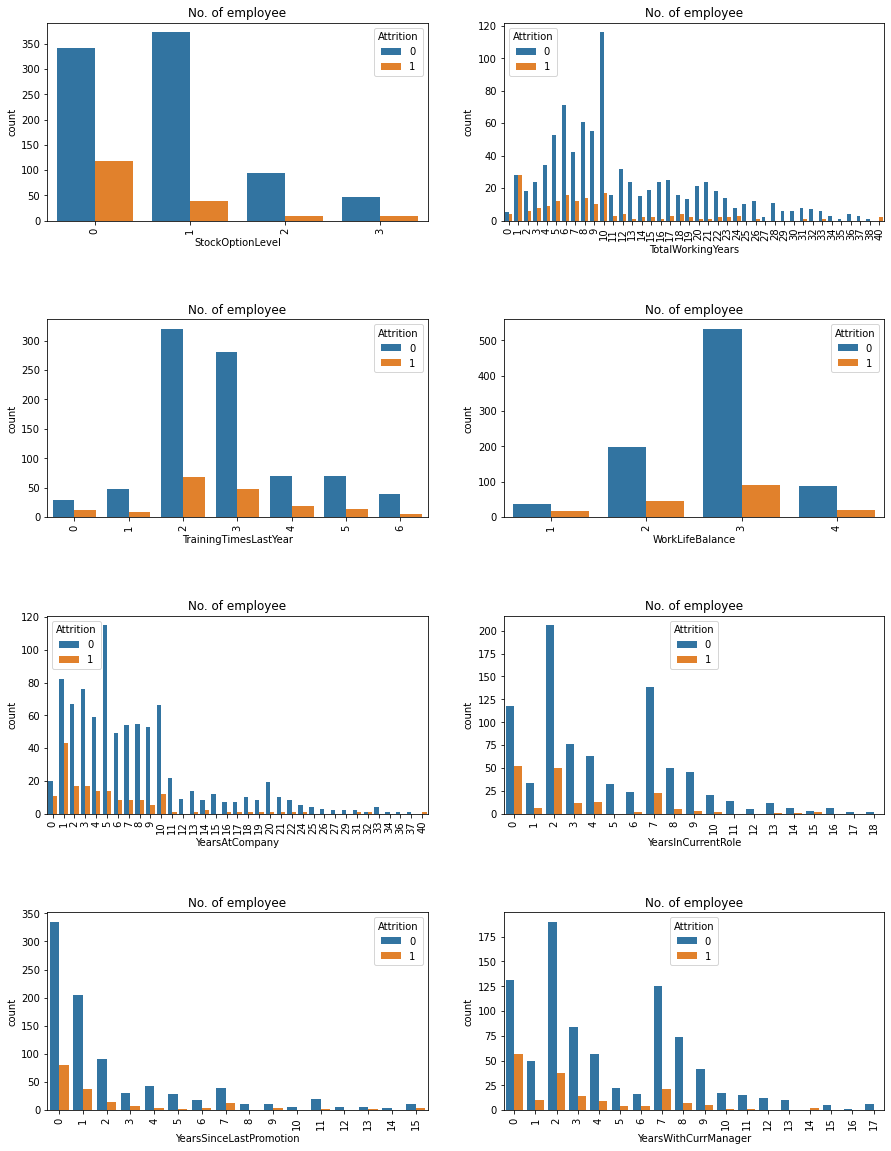

In [56]:
fig=plt.subplots(figsize=(15, 20))
for i, j in enumerate(f4):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 0.5)
    sns.countplot(x=j,data = data, hue='Attrition')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

Infernces from countplot with hue as '*Attrition*'


1.   People with age range 18-26 show higher proportion of leavers compared to their counterparts.
2.   People who travel frequently show higher proportion of leavers compared to their counterparts.

1.   People who are in Sales Department show higher proportion of leavers compared to theircounterparts.
2.   People who live further away from their work show higher normalized proportion of leavers compared to their counterparts.

1.   People with EducationField as Technical Degree show higher proportion of leavers compared to their counterparts.
2.   Male employees are more likely to leave when compared to female employees.

1.   Employees with higher Job Involvement are less likely to leave.
2.   Employees  with  an  assigned JobLevel of  ”1”  show  the  largest  normalized  proportion  of leavers.

1.   Proportion of Leaving Employees decreases as the JobSatisfactionscore increases.
2.   Employees with JobRole Sales representative are more likely to leave.

1.   People who are single show higher proportion of leavers compared to their counterparts.
2.   People who work over time show higher proportion of leavers compared to their counterparts.

1.   Employees that have already worked at several companies previously show higher proportionof leavers compared to their counterparts.

1.   Employees with StockOptionLevel 0 are more likely to leave.
2.   Employees with Work-Life Balance ’1’ are more likely to leave.

1.   Employees tend to leave the within 1-2 years.






















# **DATA** **PRE-PROCESSING**

In [57]:
le = LabelEncoder()
#ohe = OneHotEncoder(categorical )
le_count = 0
for col in data.columns[1:]:
    if data[col].dtype == 'object':
        if len(list(data[col].unique())) <= 2:
            le.fit(data[col])
            data[col] = le.transform(data[col])
            le_count += 1
#data = ohe.fit_transform(data).toarray()           
print('{} columns were label encoded.'.format(le_count))

2 columns were label encoded.


In [58]:
print(data.shape)
data.head()

(1028, 34)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,0,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,4


In [0]:
data = pd.get_dummies(data, drop_first=True)

In [60]:
print(data.shape)
data.head()

(1028, 48)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,1,2,3,1,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,1,4,4,1,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,2,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,0,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,3,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,7,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,4,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [61]:
scaler = MinMaxScaler(feature_range=(0, 1))
HR_col = list(data.columns)
HR_col.remove('Attrition')
for col in HR_col:
    data[col] = data[col].astype(float)
    data[[col]] = scaler.fit_transform(data[[col]])
data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,0.547619,1,0.715820,0.000000,0.25,0.0,0.000000,0.333333,0.0,0.914286,0.666667,0.25,1.000000,0.262454,0.698053,0.888889,1.0,0.000000,0.0,0.000000,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118,0.000000,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.738095,0,0.126700,0.250000,0.00,0.0,0.000692,0.666667,1.0,0.442857,0.333333,0.25,0.333333,0.217009,0.916001,0.111111,0.0,0.857143,1.0,1.000000,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765,0.000974,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.452381,1,0.909807,0.035714,0.25,0.0,0.002075,1.000000,1.0,0.885714,0.333333,0.00,0.666667,0.056925,0.012126,0.666667,1.0,0.285714,0.0,0.333333,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000,0.001947,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.357143,0,0.923407,0.071429,0.75,0.0,0.002766,1.000000,0.0,0.371429,0.666667,0.00,0.666667,0.100053,0.845814,0.111111,1.0,0.000000,0.0,0.666667,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000,0.002921,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.214286,0,0.350036,0.035714,0.00,0.0,0.004149,0.000000,1.0,0.142857,0.666667,0.00,0.333333,0.129489,0.583738,1.000000,0.0,0.071429,0.0,1.000000,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647,0.003895,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [62]:
data_copy = data.copy()
data_copy.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,0.547619,1,0.715820,0.000000,0.25,0.0,0.000000,0.333333,0.0,0.914286,0.666667,0.25,1.000000,0.262454,0.698053,0.888889,1.0,0.000000,0.0,0.000000,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118,0.000000,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.738095,0,0.126700,0.250000,0.00,0.0,0.000692,0.666667,1.0,0.442857,0.333333,0.25,0.333333,0.217009,0.916001,0.111111,0.0,0.857143,1.0,1.000000,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765,0.000974,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.452381,1,0.909807,0.035714,0.25,0.0,0.002075,1.000000,1.0,0.885714,0.333333,0.00,0.666667,0.056925,0.012126,0.666667,1.0,0.285714,0.0,0.333333,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000,0.001947,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.357143,0,0.923407,0.071429,0.75,0.0,0.002766,1.000000,0.0,0.371429,0.666667,0.00,0.666667,0.100053,0.845814,0.111111,1.0,0.000000,0.0,0.666667,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000,0.002921,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.214286,0,0.350036,0.035714,0.00,0.0,0.004149,0.000000,1.0,0.142857,0.666667,0.00,0.333333,0.129489,0.583738,1.000000,0.0,0.071429,0.0,1.000000,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647,0.003895,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [63]:
#CORRELATION
data_corr = data.copy()
data_corr['Target'] = data_corr['Attrition'].apply(lambda x: 0 if x == 0 else 1)
data_corr = data_corr.drop(['Attrition','EmployeeCount','EmployeeNumber','ID'], axis = 1)
correlations = data_corr.corr()['Target']
print(abs(correlations).sort_values())

JobRole_Sales Executive              0.001968
JobRole_Human Resources              0.005046
EducationField_Other                 0.005273
PerformanceRating                    0.005300
PercentSalaryHike                    0.008138
HourlyRate                           0.018472
JobRole_Research Scientist           0.019628
EducationField_Life Sciences         0.023500
MonthlyRate                          0.025739
Gender                               0.027004
YearsSinceLastPromotion              0.031826
NumCompaniesWorked                   0.037174
TrainingTimesLastYear                0.038728
BusinessTravel_Travel_Rarely         0.040013
Education                            0.041021
EducationField_Marketing             0.041458
EducationField_Medical               0.042444
RelationshipSatisfaction             0.050263
DailyRate                            0.050566
Department_Research & Development    0.056716
EducationField_Technical Degree      0.064008
Department_Sales                  

In [64]:
target = data['Attrition'].copy()
type(target)

pandas.core.series.Series

We drop some of the features considering

*   the inferences from histogram, countplots
*   and correlation values


In [65]:
data.drop(['Attrition', 'EmployeeCount','ID','EmployeeNumber','EducationField_Life Sciences','EducationField_Marketing','EducationField_Medical',
           'EducationField_Other','EducationField_Technical Degree','DailyRate','Education','HourlyRate','MonthlyRate','PercentSalaryHike',
          'PerformanceRating','TrainingTimesLastYear','YearsSinceLastPromotion'], axis=1, inplace=True)
print('Size of Full dataset is: {}'.format(data.shape))
data.head()

Size of Full dataset is: (1028, 31)


,Age,DistanceFromHome,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,0.547619,0.000000,0.333333,0.0,0.666667,0.25,1.000000,0.262454,0.888889,1.0,0.000000,0.000000,0.200,0.000000,0.15,0.222222,0.294118,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.738095,0.250000,0.666667,1.0,0.333333,0.25,0.333333,0.217009,0.111111,0.0,1.000000,0.333333,0.250,0.666667,0.25,0.388889,0.411765,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.452381,0.035714,1.000000,1.0,0.333333,0.00,0.666667,0.056925,0.666667,1.0,0.333333,0.000000,0.175,0.666667,0.00,0.000000,0.000000,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.357143,0.071429,1.000000,0.0,0.666667,0.00,0.666667,0.100053,0.111111,1.0,0.666667,0.000000,0.200,0.666667,0.20,0.388889,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.214286,0.035714,0.000000,1.0,0.666667,0.00,0.333333,0.129489,1.000000,0.0,1.000000,0.333333,0.150,0.666667,0.05,0.111111,0.117647,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [0]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0)

# **MODELING AND TESTING**

In [67]:
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
print('Logistic regression accuracy of validation data: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))
print(classification_report(y_test, logreg.predict(X_test)))
#print(f1_score(y_test,logreg.predict(X_test)))

Logistic regression accuracy of validation data: 0.874
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       177
           1       0.60      0.31      0.41        29

    accuracy                           0.87       206
   macro avg       0.75      0.64      0.67       206
weighted avg       0.85      0.87      0.86       206



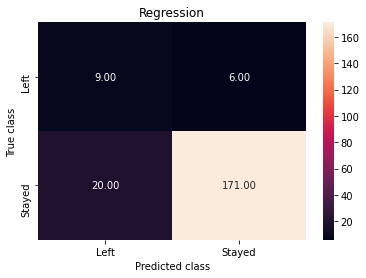

In [69]:
y_pred = logreg.predict(X_test)
logreg_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Regression')
plt.savefig('random_forest')

In [70]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [71]:
print('Random Forest Accuracy of validation data: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))
print(classification_report(y_test, rf.predict(X_test)))

Random Forest Accuracy of validation data: 0.864
              precision    recall  f1-score   support

           0       0.87      0.98      0.93       177
           1       0.57      0.14      0.22        29

    accuracy                           0.86       206
   macro avg       0.72      0.56      0.57       206
weighted avg       0.83      0.86      0.83       206



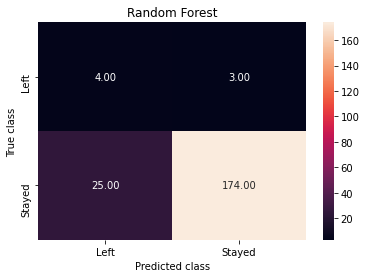

In [72]:
y_pred = rf.predict(X_test)
forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

In [73]:
svc = SVC(random_state=0, probability=True)
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [74]:
print('Support vector machine accuracy of validation data: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))
print(classification_report(y_test, svc.predict(X_test)))

Support vector machine accuracy of validation data: 0.879
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       177
           1       0.67      0.28      0.39        29

    accuracy                           0.88       206
   macro avg       0.78      0.63      0.66       206
weighted avg       0.86      0.88      0.86       206



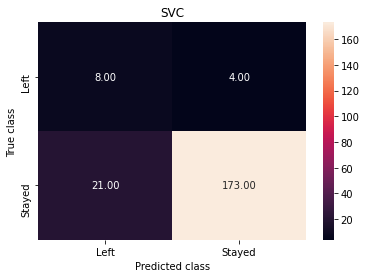

In [75]:
y_pred = svc.predict(X_test)
svc_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(svc_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('SVC')
plt.savefig('random_forest')

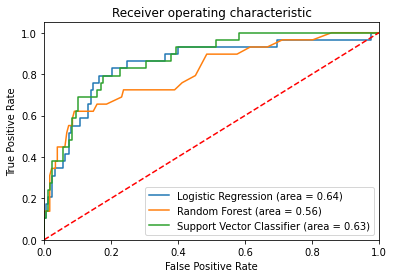

In [76]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

svc_roc_auc = roc_auc_score(y_test, svc.predict(X_test))
svc_fpr, svc_tpr, svc_thresholds = roc_curve(y_test, svc.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
#plt.plot(lr_bal_fpr, lr_bal_tpr, label='Logistic Regression balanced(area = %0.2f)' % logit_bal_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier (area = %0.2f)' % svc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

In [0]:
#data_test = pd.read_csv('/kaggle/input/ee-769-assignment1/test.csv')
#data_test_copy = data_test.copy()

#Pre-processing
# le_count = 0
# for col in data_test.columns[1:]:
#     if data_test[col].dtype == 'object':
#         if len(list(data_test[col].unique())) <= 2:
#             le.fit(data_test[col])
#             data_test[col] = le.transform(data_test[col])
#             le_count += 1
# print('{} columns were label encoded.'.format(le_count))

# data_test = pd.get_dummies(data_test, drop_first=True)

# scaler = MinMaxScaler(feature_range=(0, 1))
# HR_test_col = list(data_test.columns)
# HR_test_col.remove('ID')
# for col in HR_test_col:
#     data_test[col] = data_test[col].astype(float)
#     data_test[[col]] = scaler.fit_transform(data_test[[col]])
# data_test.head()

# data_test.drop(['EmployeeCount','ID','EmployeeNumber','EducationField_Life Sciences','EducationField_Marketing',
#                 'EducationField_Medical','EducationField_Other','EducationField_Technical Degree','DailyRate','Education',
#                 'HourlyRate','MonthlyRate','PercentSalaryHike','PerformanceRating','TrainingTimesLastYear','YearsSinceLastPromotion'], axis=1, inplace=True)
# #data_test.drop(['EmployeeCount', 'EmployeeNumber'], axis=1, inplace=True)

# #Modeling
# logreg = LogisticRegression(random_state=0)
# logreg.fit(data, target)

# logreg_balanced = LogisticRegression(random_state=0, class_weight = 'balanced')
# logreg_balanced.fit(data, target)

# rf = RandomForestClassifier(random_state=0)
# rf.fit(data, target)

# svc = SVC(random_state=0)
# svc.fit(data, target)

# target_test = svc.predict(data_test)
# #target_test = logreg.predict(data_test)
# print(target_test)

# out = pd.DataFrame(data_test_copy, columns = ['ID'])
# out['Attrition'] = target_test

# out.to_csv('out.csv', index = False)